In [425]:
import random
from statistics import mean 
import matplotlib.pyplot as plt

In [426]:
# Initialize variables
disk_size = 200
initial_head_position = 50

In [427]:
# Different sets of requests
request_sizes = [10, 20, 50, 100]

In [428]:
# Create a dictionary to store requests for each size
all_requests = {}

# Dictionary to store results
results_scan = {}
results_c_scan = {}
results_c_look = {}

In [429]:
def scan(requests, head, disk_size):
    # Initialize variables specific to the SCAN algorithm
    left = []
    right = []
    cur_track = -1
    seek_sequence = []
    seek_counter = 0
    seek_count = 0
    previous_track = head
    distances = []
    formatted_distances = []
    requests_copy = requests.copy()
    
    # Append end values that need to be visited before reversing the direction
#     left.append(0)
    if (disk_size - 1) not in requests_copy:
        requests_copy.append(disk_size - 1)
        
    
    # Divide requests_copy into left and right tracks
    for track in requests_copy:
        if track < head:
            left.append(track)
        if track > head:
            right.append(track)
            
    # Sort left and right vectors 
    left.sort()
    right.sort()
    
    # Run the while loop for both left and right directions
    for direction in ["right", "left"]:
        if direction == "right":
            for i in range(len(right)):
#                 if cur_track != right[i]:
#                     cur_track = right[i]
#                     if cur_track in right:  # Check if the current track is in right
#                         seek_sequence.append(cur_track)
#                         seek_count += abs(cur_track - previous_track)  # Calculate seek count directly
                    
#                         if cur_track > previous_track:
#                             formatted_distance = f"{cur_track} - {previous_track}"
#                         else:
#                             formatted_distance = f"{previous_track} - {cur_track}"
#                         formatted_distances.append(formatted_distance)  # Store formatted string in the array
                        
#                         previous_track = cur_track
#                         seek_counter += 1  # Increment seek counter
#                         if seek_counter == len(requests_copy):  # Stop seeking if the counter reaches the number of requests
#                             break
                cur_track = right[i]
                if cur_track in right:  # Check if the current track is in right
                    seek_sequence.append(cur_track)
                    seek_count += abs(cur_track - previous_track)  # Calculate seek count directly
                    
                    if cur_track > previous_track:
                        formatted_distance = f"{cur_track} - {previous_track}"
                    else:
                        formatted_distance = f"{previous_track} - {cur_track}"
                    formatted_distances.append(formatted_distance)  # Store formatted string in the array
                        
                    previous_track = cur_track
                    seek_counter += 1  # Increment seek counter
                    if seek_counter == len(requests_copy):  # Stop seeking if the counter reaches the number of requests
                        break
            
            direction = "left"
         
        elif direction == "left":
            for i in range(len(left) - 1, -1, -1):
                cur_track = left[i]
                if cur_track in requests_copy:  # Check if the current track is in requests
                    seek_sequence.append(cur_track)
                    seek_count += abs(cur_track - previous_track)  # Calculate seek count directly
                    
                    if cur_track > previous_track:
                        formatted_distance = f"{cur_track} - {previous_track}"
                    else:
                        formatted_distance = f"{previous_track} - {cur_track}"
                    formatted_distances.append(formatted_distance)  # Store formatted string in the array
                    
                    previous_track = cur_track
                    seek_counter += 1  # Increment seek counter
                    if seek_counter == len(requests_copy):  # Stop seeking if the counter reaches the number of requests
                        break
            direction = "right"
        
    # Calculate worst case seek time
    if len(seek_sequence) > 1:
        max_distance = max(abs(seek_sequence[i] - seek_sequence[i - 1]) for i in range(1, len(seek_sequence)))
        worst_case_seek_time = max_distance
    else:
        worst_case_seek_time = 0
        
    avg_seek_time = seek_count / len(requests_copy)
    
#     return avg_seek_time, worst_case_seek_time, seek_sequence, formatted_distances, seek_count, len(requests), left_array, right_array
#     return avg_seek_time, worst_case_seek_time, seek_sequence, formatted_distances, seek_count, len(requests)
#     return avg_seek_time, worst_case_seek_time, seek_sequence, formatted_distances, seek_count, seek_counter
    return avg_seek_time, worst_case_seek_time, seek_sequence, formatted_distances, seek_count, len(requests_copy)


In [430]:
def c_scan(requests, head, disk_size):
    current_position = head
    seek_count = 0
    #seek_sequence = []
    worst_case_seek_time = 0
    worst_case_position = None  # Initialize to None
    formatted_distances = []
    
    # position like 0, 50, and 199
    boundary_occurrences_in_request = 0
    
    # Manually insert the 0 and 199 into the lists
    left = [0]
    right = [disk_size - 1]

    for req in requests:
        # Append requests to different list
        if req != 0 and req != disk_size - 1 and req!= head:
            if req < head:
                left.append(req)
            elif req > head:
                right.append(req)
        # If the 0, 199 and head occurs in the random request, then just add the counter but not adding again into the list
        else:
            boundary_occurrences_in_request += 1
    # Calculating new total size(after adding 3 values)
    new_total_size = len(requests) + (2 - boundary_occurrences_in_request)
    
    # Sort the left and right list
    left.sort()
    right.sort()
    
    if right[0] == head: # If the head position already have request, then dont insert 
        x_points = []    # Clear x_points since the head is already in the request list
    else:
        x_points = [head]# Otherwise, initialize x_points with the head position so the graph start with head position
    y_points = [] # Normal initialisation for ploting graph later
    
    # Tracking to the right side
    for track in right:
        distance = abs(track - current_position)
        if track > current_position:
            formatted_distance = f"{track} - {current_position}"
        else:
            formatted_distance = f"{current_position} - {track}"
        formatted_distances.append(formatted_distance)  # Store formatted string in the array
        
        seek_count += distance
        if distance > worst_case_seek_time:
            worst_case_seek_time = distance # Keep track of worst case seek time
            worst_case_position = track # Keep track of the position to occurs worst case seek times
        current_position = track
        x_points.append(track) # Append request to list for ploting purpose
    
    # When meet the end of the disk, returning back to 0
    current_position = 0
    distance = abs((disk_size - 1) - current_position)
    formatted_distance = f"{disk_size - 1} - {current_position}"
    formatted_distances.append(formatted_distance)  # Store formatted string in the array
    seek_count += distance
    # Worst case seek time not count this
    
    # Tracking to the left side
    for track in left:
        distance = abs(track - current_position)
        # Condition of meeting the 0 when the head already at 0
        if track != current_position:
            if track > current_position:
                formatted_distance = f"{track} - {current_position}"
            else:
                formatted_distance = f"{current_position} - {track}"
            formatted_distances.append(formatted_distance)  # Store formatted string in the array
        
        seek_count += distance
        if distance > worst_case_seek_time:
            worst_case_seek_time = distance# Keep track of worst case seek time
            worst_case_position = track # Keep track of the position to occurs worst case seek times
        current_position = track
        x_points.append(track)# Append request to list for ploting purpose
        
    # If the first request position is the same as the head position(The requests already sorted so the first one will be either head or not head)
    if right[0] == head:
        for i in range(0,new_total_size): # Previously didnt append the head to here, so maintain new_total_size
            y_points.append(-i)
    else:
        for i in range(0,new_total_size + 1): # Previously initialise with head, so need to add 1 more value
            y_points.append(-i)
    
    # Initialise variable to hold position of the end of disk and worst case seek time position
    final_position = x_points.index(199)
    worst_case_index_position = -1
    
    # Search for the position of 199 or end of disk
    for i in x_points:
        if i == (disk_size - 1):
            final_position = x_points.index(disk_size - 1)
            break
            
    # Search for the position of the worst case seek time
    for i in x_points:
        if i == worst_case_position:
            worst_case_index_position = x_points.index(worst_case_position) -1
            break

    # Calculating Average seek time
    avg_seek_time = seek_count / new_total_size
    
    # Exclude the final_position from x_points and y_points
    filtered_x_points = x_points[:final_position] + x_points[final_position+1:]
    filtered_y_points = y_points[:final_position] + y_points[final_position+1:]
    
    # Ploting for normal seek time (without worst case seek time and from end of disk to start of disk)
    plt.plot(x_points[:final_position+1], y_points[:final_position+1], color="green", markerfacecolor='blue', marker='o', markersize=5, linewidth=2, label="CSCAN")
    plt.plot(x_points[final_position+1:], y_points[final_position+1:], color="green", markerfacecolor='blue', marker='o', markersize=5, linewidth=2, label="CSCAN")
    
    # Ploting the end of disk back to start of disk with blue line
    plt.plot(x_points[final_position:final_position+2], y_points[final_position:final_position+2], color="blue", markerfacecolor='blue', marker='o', markersize=5, linewidth=1, linestyle='--', label="CSCAN - Dashed Area")
    
    # Ploting the worst case seek time with red line
    plt.plot(x_points[worst_case_index_position:worst_case_index_position+2], y_points[worst_case_index_position:worst_case_index_position+2], color="red", markerfacecolor='blue', marker='o', markersize=5, linewidth=3, linestyle='-', label="CSCAN - Dashed Area")

    # Annotate each point with its value above the point(exclude request size of 100 due to huge size of requests)
    if len(requests) != 100:
        for x, y, label in zip(x_points, y_points, x_points):
            plt.text(x, y, str(label), ha='right', va='top', fontsize=8, color='black', alpha=0.7)
    
    # Calculate the midpoint between two points of the worst-case seek time
    midpoint_x = (x_points[worst_case_index_position] + x_points[worst_case_index_position + 1]) / 2
    midpoint_y = (y_points[worst_case_index_position] + y_points[worst_case_index_position + 1]) / 2
    
    # Conditionally adjust xytext based on the length of requests
    if len(requests) < 50:
        # If it happen on the right side
        if worst_case_position >= head:
            # Set the text position to the left bottom
            xytext = (x_points[worst_case_index_position] - 2, y_points[worst_case_index_position] - 3)
        # Else it happen on the left side
        else:
            # Set the text position to the right top
            xytext = (x_points[worst_case_index_position] - 2, y_points[worst_case_index_position] + 3)  
    else:
        # If it happen on the right side
        if worst_case_position >= head:
            xytext = (x_points[worst_case_index_position] - 20, y_points[worst_case_index_position] - 10)
        # Else it happen on the left side
        else:
            xytext = (x_points[worst_case_index_position] - 5, y_points[worst_case_index_position] + 5)
    
    # Annotate the worst-case seek time
    plt.annotate('Worst Case', xy=(midpoint_x, midpoint_y), 
        xytext = xytext,
        arrowprops=dict(facecolor='red', arrowstyle='-'),
        fontsize=9, color='red', alpha=0.9)
    
    # Title of the graph
    plt.title("CSCAN Scheduling Algorithm - Random Requests Set of {}".format(len(requests)))
    plt.xlabel('Cylinder Number')
    plt.ylabel('Seek Sequence')
    
    plt.yticks([])# Hide the y-axis
    plt.show()

 # Returning both average and worst-case seek times
    return avg_seek_time, worst_case_seek_time, formatted_distances, seek_count, new_total_size

In [431]:
def c_look(arr, head):
     
    seek_count = 0
    distance = 0
    cur_track = 0
    avg_seek_time =0
    worst_case_seek_time = 0
 
    left = []
    right = []
 
    seek_sequence = []
    formatted_distances = []
 
    # Split tracks into left and right based on head position
    for i in range(size):
        if (arr[i] < head):
            left.append(arr[i])
        if (arr[i] > head):
            right.append(arr[i])
 
    # Sort left and right tracks
    left.sort()
    right.sort()
 
    # Process tracks to the right of the head
    for i in range(len(right)):
        cur_track = right[i]
         
        # Appending current track seek sequence
        seek_sequence.append(cur_track)
 
        # Calculate absolute distance
        distance = abs(cur_track - head)
        
        if cur_track > head:
            formatted_distance = f"{cur_track} - {head}"
        else:
            formatted_distance = f"{head} - {cur_track}"
        formatted_distances.append(formatted_distance)  # Store formatted string in the array
 
        # Increase the total count
        seek_count += distance
 
        # Accessed track is now new head
        head = cur_track
    
    # Move to the leftmost track and continue processing
    seek_count += abs(head - left[0])
    formatted_distance = f"{head} - {left[0]}"
    formatted_distances.append(formatted_distance)  # Store formatted string in the array
    head = left[0]
 
    # Process tracks to the left of the head
    for i in range(len(left)):
        cur_track = left[i]
 
        # Appending current track to seek sequence
        seek_sequence.append(cur_track)
 
        # Calculate absolute distance
        distance = abs(cur_track - head)
        
        # Calculate absolute distance
        distance = abs(cur_track - head)
        
        if cur_track > head:
            formatted_distance = f"{cur_track} - {head}"
        else:
            formatted_distance = f"{head} - {cur_track}"
        formatted_distances.append(formatted_distance)  # Store formatted string in the array
 
        # Increase the total count
        seek_count += distance
 
        # Accessed track is now the new head
        head = cur_track
        
    # Calculate worst case seek time
    max_distance = max(abs(seek_sequence[i] - seek_sequence[i - 1]) for i in range(1, len(seek_sequence)))
    worst_case_seek_time = max_distance
    
    # Calculate average seek time
    avg_seek_time = seek_count / size
    
    return avg_seek_time, worst_case_seek_time, seek_sequence, formatted_distances, seek_count, size

In [432]:
def plot_c_look(seek_sequence, worst_case_seek_time, request_size):
    
    seek_sequence = [50] + seek_sequence
    # Convert the seek sequence to negative values
    negative_sequence = [-x for x in range(len(seek_sequence))]

    # Plotting the seek sequence
    plt.plot(seek_sequence, negative_sequence, marker='o')
    
    for i, txt in enumerate(seek_sequence):
        plt.annotate(txt, (seek_sequence[i], negative_sequence[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=7)

    # Highlighting the worst case seek time
    for i in range(1, len(seek_sequence)):
        if abs(seek_sequence[i] - seek_sequence[i-1]) == worst_case_seek_time:
            plt.plot([seek_sequence[i-1], seek_sequence[i]], [-(i-1), -i], color='red', linewidth=2, label='Worst Case')
            break

    plt.xlabel('Cylinder Number')
    plt.ylabel('Seek Sequence')
    plt.title(f'CLOOK Scheduling Algorithm - Random Requests Set of {request_size}')
    plt.yticks([])# Hide the y-axis
    plt.legend()
    plt.show()

In [433]:
def plot_scan(seek_sequence, worst_case_seek_time, request_size):
    seek_sequence = [50] + seek_sequence
    negative_sequence = [-x for x in range(len(seek_sequence))]

    # Plotting the seek sequence with a single color for points and connecting lines
    plt.plot(seek_sequence, negative_sequence, marker='o', color='blue', linestyle='-', linewidth=1)

    # Annotating each point with its corresponding cylinder number
    for i, (x, y) in enumerate(zip(seek_sequence, negative_sequence)):
        plt.text(x, y, str(seek_sequence[i]), ha='right', va='bottom')

    for i in range(1, len(seek_sequence)):
        if abs(seek_sequence[i] - seek_sequence[i - 1]) == worst_case_seek_time:
            plt.plot([seek_sequence[i - 1], seek_sequence[i]], [-(i - 1), -i], color='red', linewidth=2,
                     label='Worst Case')
            break

    plt.xlabel('Cylinder Number')
    plt.ylabel('Seek Sequence')
    plt.title(f'SCAN Scheduling Algorithm - Random Requests Set of {request_size}')
    plt.yticks([])# Hide the y-axis
    plt.legend()
    plt.show()

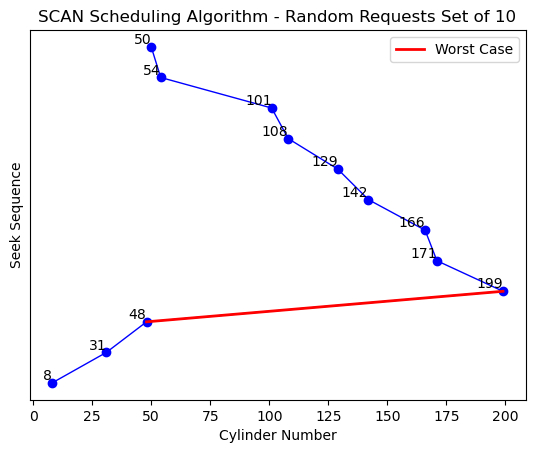

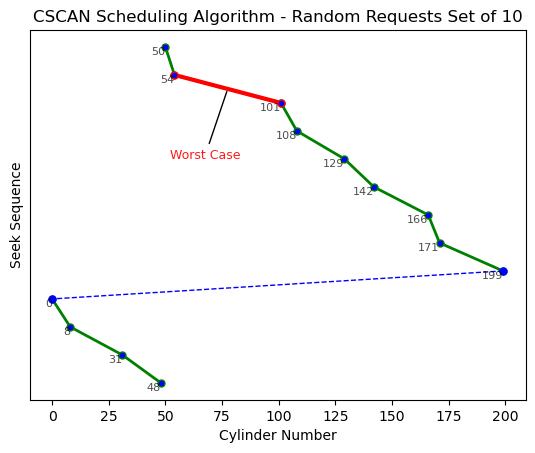

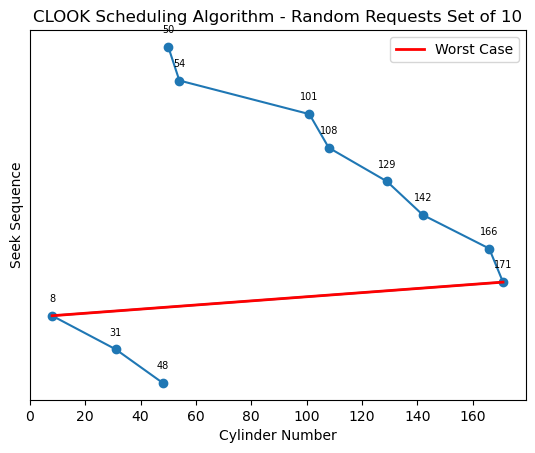

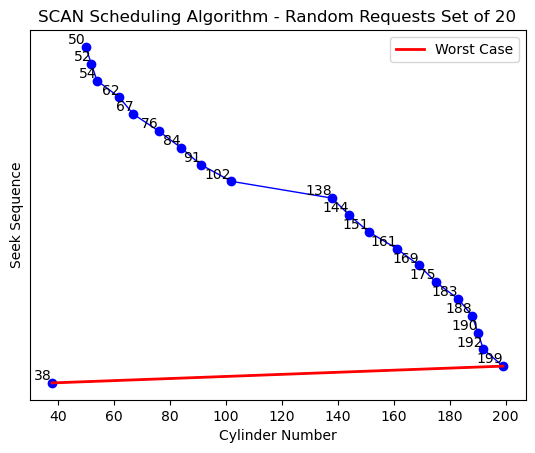

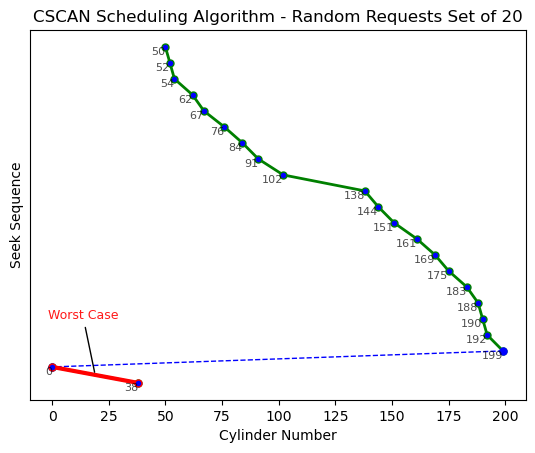

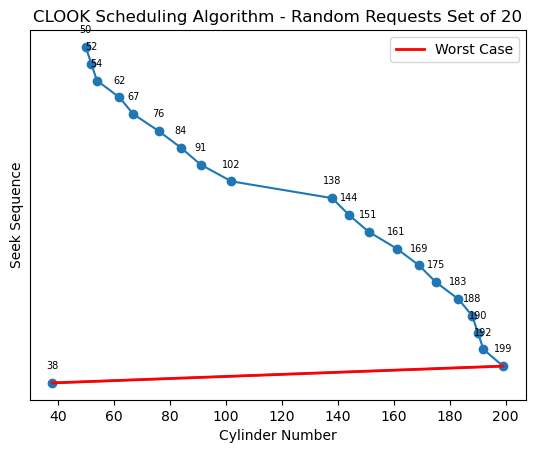

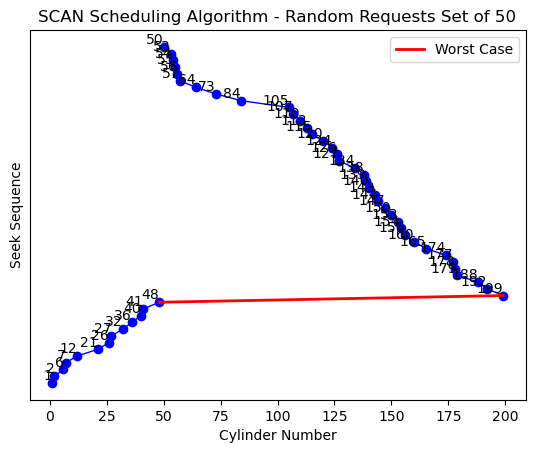

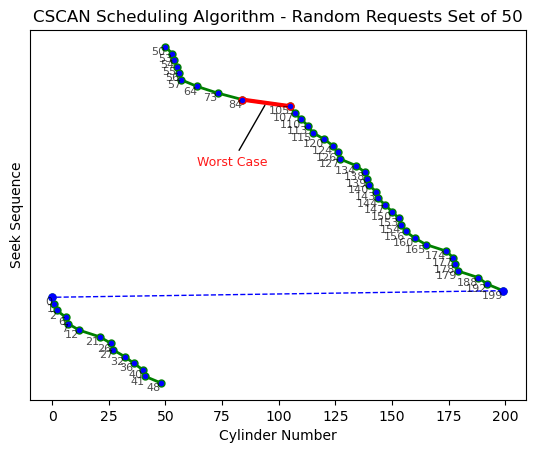

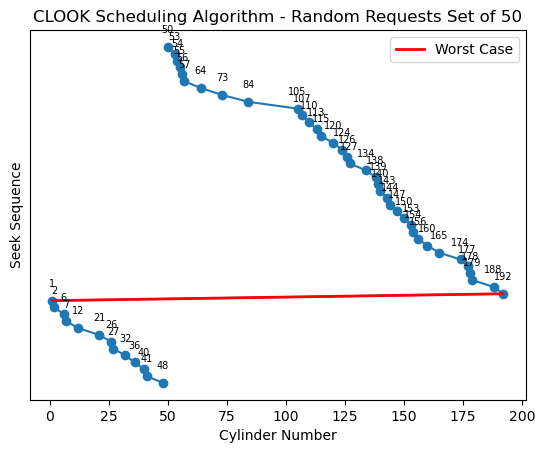

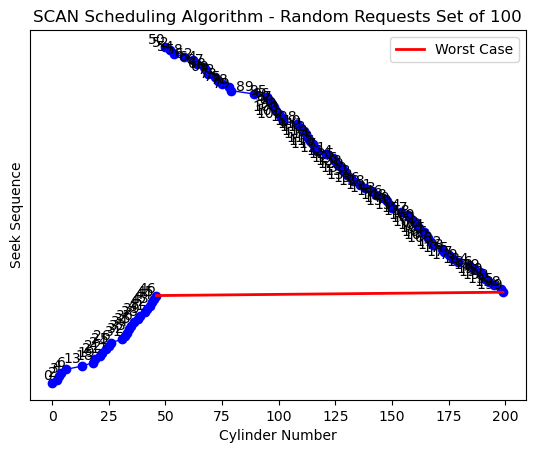

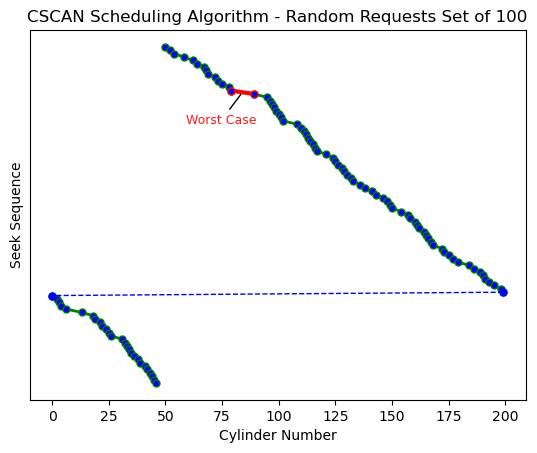

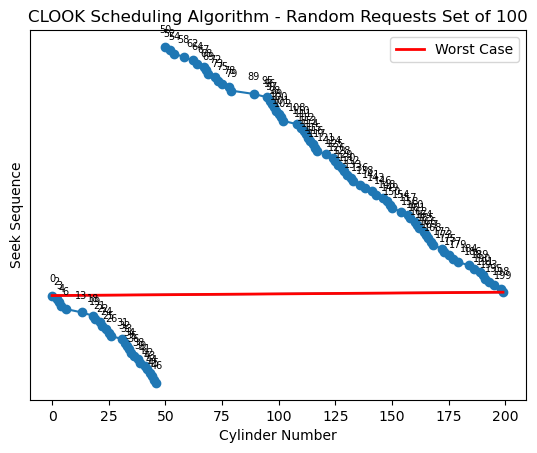

In [436]:
for size in request_sizes:    
    requests = random.sample(range(disk_size), size)
    all_requests[size] = requests
    
    avg_seek_scan, worst_seek_scan, seek_sequence, scan_calculation_formula, seek_count, total_size_dividing = scan(requests, initial_head_position, disk_size)
    results_scan[size] = (avg_seek_scan, worst_seek_scan, scan_calculation_formula, seek_count, total_size_dividing)
    plot_scan(seek_sequence, worst_seek_scan, size)
    
    avg_seek_c_scan, worst_seek_c_scan,c_scan_calculation_formula, seek_count, total_size_dividing = c_scan(requests, initial_head_position, disk_size)
    results_c_scan[size] = (avg_seek_c_scan, worst_seek_c_scan, c_scan_calculation_formula, seek_count, total_size_dividing)
    
#     avg_seek_c_look, worst_seek_c_look, seek_sequence， c_look_calculation_formula, seek_count, total_size_dividing = c_look(requests, initial_head_position)
    
    avg_seek_c_look, worst_seek_c_look, seek_sequence, c_look_calculation_formula, seek_count, total_size_dividing = c_look(requests, initial_head_position)
    results_c_look[size] = (avg_seek_c_look, worst_seek_c_look, c_look_calculation_formula, seek_count, total_size_dividing)
    plot_c_look(seek_sequence, worst_seek_c_look, size)

In [437]:
algorithm_results = {
    "SCAN": results_scan,
    "C-SCAN": results_c_scan,
    "C-LOOK": results_c_look,
}


In [438]:
for size in request_sizes:
    print(f"Random request set with size of {size}:\n{all_requests[size]}\n")

    for algorithm_name, results in algorithm_results.items():
        avg_seek_time, worst_case_seek_time,calculation_formula, seek_count, total_size_dividing = results[size]
        print(f"--------------------------------------------- {algorithm_name} ---------------------------------------------")
        print(f"{algorithm_name} RESULTS for request size {size}:")
        print(f"  Average Seek Time: {avg_seek_time}")
        print(f"  Worst-Case Seek Time: {worst_case_seek_time}\n")
        
        # Print the formatted calculation formula
        formatted_formula = '(' + ') + ('.join(calculation_formula) + f') \n= {seek_count}'
        print(f"  Total seek time \n= {formatted_formula}\n")
        
        avg_seek_time_formula = f"= {seek_count} / {total_size_dividing} \n= {avg_seek_time}"
        print(f"  Calculated Average Seek Time \n{avg_seek_time_formula}\n")


    print(f"--------------------- End of random request set with size of {size} ----------------------------")
    print("\n\n\n\n")  # Add an empty line for better separation between sets


Random request set with size of 10:
[54, 8, 171, 166, 31, 129, 48, 101, 142, 108]

--------------------------------------------- SCAN ---------------------------------------------
SCAN RESULTS for request size 10:
  Average Seek Time: 30.90909090909091
  Worst-Case Seek Time: 151

  Total seek time 
= (54 - 50) + (101 - 54) + (108 - 101) + (129 - 108) + (142 - 129) + (166 - 142) + (171 - 166) + (199 - 171) + (199 - 48) + (48 - 31) + (31 - 8) 
= 340

  Calculated Average Seek Time 
= 340 / 11 
= 30.90909090909091

--------------------------------------------- C-SCAN ---------------------------------------------
C-SCAN RESULTS for request size 10:
  Average Seek Time: 33.0
  Worst-Case Seek Time: 47

  Total seek time 
= (54 - 50) + (101 - 54) + (108 - 101) + (129 - 108) + (142 - 129) + (166 - 142) + (171 - 166) + (199 - 171) + (199 - 0) + (8 - 0) + (31 - 8) + (48 - 31) 
= 396

  Calculated Average Seek Time 
= 396 / 12 
= 33.0

--------------------------------------------- C-LOOK ------